## MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)

### importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

### Loading the MNIST Dataset from Keras.dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(y_train)

numpy.ndarray

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Training images = 60,000

Testing images = 10,000

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [5]:
# printing the 15th image from
print(x_train[15])
print(y_train[15])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 115 121 162
  253 253 213   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 107 170 25

In [6]:
x_train[15].shape

(28, 28)

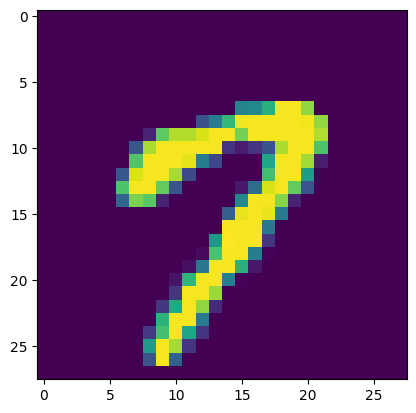

In [7]:
# displaying the image
plt.imshow(x_train[15])

### Image Lables

In [8]:
print(y_test.shape,  y_test.shape)

(10000,) (10000,)


In [9]:
# unique values in Y_train
print(np.unique(y_train))

# unique values in Y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

### Normalizing the images [0 - 1]
by default the pixle values of our images are laying between 0 to 255. we need to normalize it 0 to 1 by dividing pixle values to 255 which is the highest pixle value in an image.

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train[15]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Building the Neural Network

1. setting up the layers of the Neural  Network

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
]
)

2. compiling the Neural Network

In [13]:
model.compile(
    optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)


3.  training the Neural Network

In [14]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3018 - accuracy: 0.9122
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1415 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1047 - accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0846 - accuracy: 0.9740
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0710 - accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0615 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9831
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0472 - accuracy: 0.9851
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9872
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.036

Training Accuracy = 98.78%

4. evaluating the Neural Network

In [15]:
loss , accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0987 - accuracy: 0.9727
Test Loss: 0.09867355227470398
Test Accuracy: 0.9726999998092651


Testing Accuracy = 97.26%




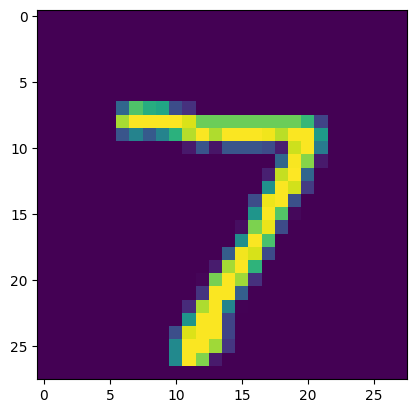

In [16]:
plt.imshow(x_test[0])
plt.show()

In [17]:
print(y_test[0])

7


### Model Prediction

In [18]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [19]:
y_pred.shape

(10000, 10)

In [20]:
print(y_pred[0])

[1.0918123e-05 1.4384228e-02 3.0518371e-01 9.7397149e-01 1.1106696e-06
 2.6508645e-04 1.5152709e-11 9.9999994e-01 3.1631565e-01 1.4256778e-01]


model.predict() gives the prediction probability of each class for that data point

1. converting the probablites into predicted class lables.
we use argmax() method for this task which return the class label with highest probability.

In [21]:
class_labels_for_first_image = np.argmax(y_pred[0])
print(class_labels_for_first_image)

7


converting the prediction probabilities to class label for all test data points


In [22]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)
y_pred_labels = np.array(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 7, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

In [23]:
#y_test.shape
y_pred_labels.shape

(10000,)

In [24]:
# Assuming 'y_pred' contains the raw model predictions (probabilities)
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_labels, num_classes=10)
print(confusion_matrix)

tf.Tensor(
[[ 960    0    2    2    2    5    2    5    2    0]
 [   0 1124    3    3    0    1    1    1    2    0]
 [   2    2  996    5    2    1    1   11   10    2]
 [   0    0    3  984    2    3    0    5    3   10]
 [   0    1    2    0  961    3    4    5    0    6]
 [   2    0    0    9    2  866    2    3    5    3]
 [   5    2    2    2    9   20  915    0    3    0]
 [   1    3    8    0    0    0    0 1009    3    4]
 [   0    0    5    8    6    9    0    4  940    2]
 [   2    2    0    3   12    4    1   13    2  970]], shape=(10, 10), dtype=int32)


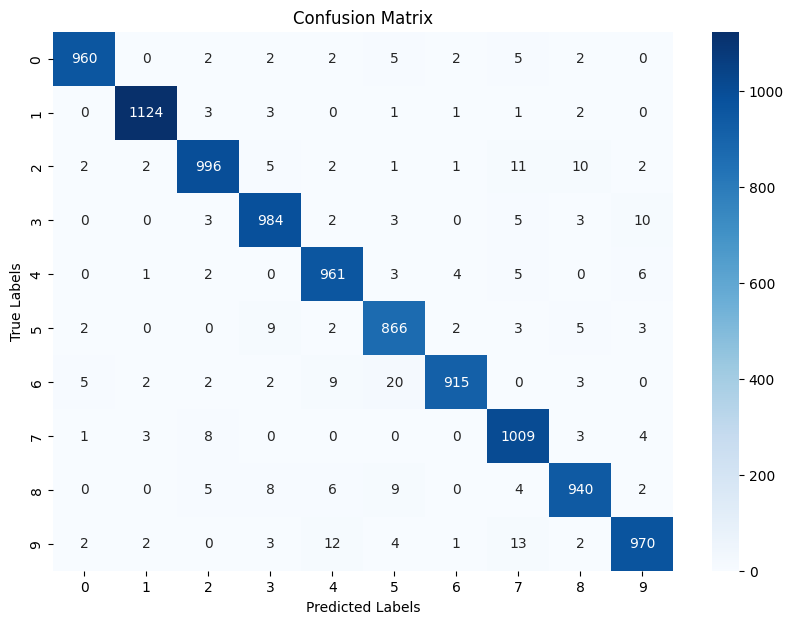

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [26]:
input_image = "/content/hand_written_digit.png"
input_image = cv2.imread(input_image)

In [28]:
type(input_image)

numpy.ndarray

In [27]:
input_image.shape

(825, 829, 3)

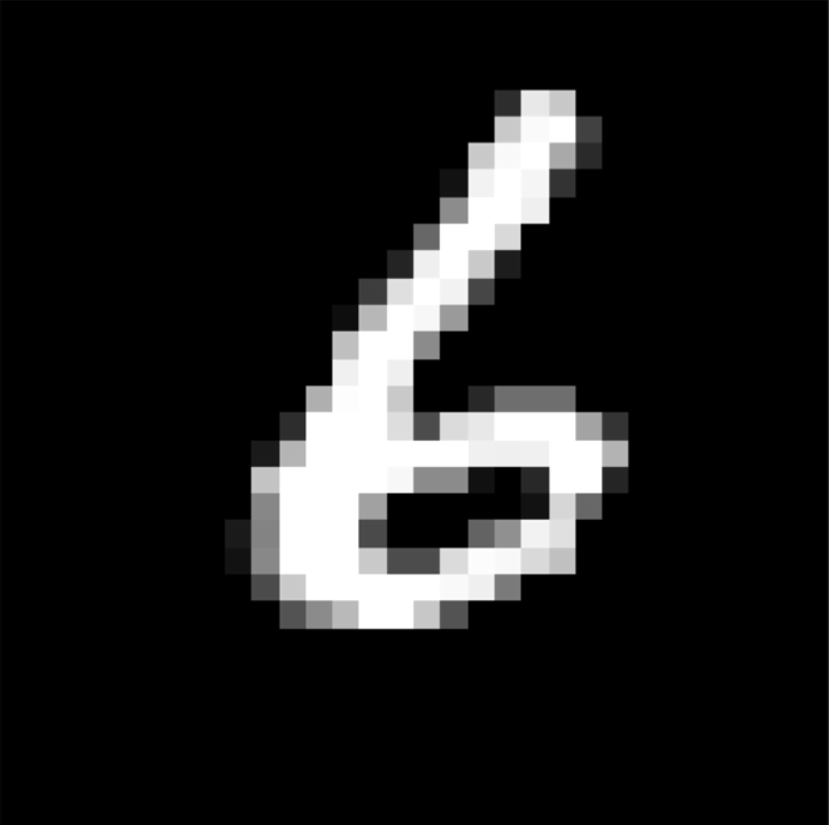

In [29]:
cv2_imshow(input_image)

In [30]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [31]:
grayscale.shape

(825, 829)

In [35]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [33]:
input_image_resize.shape

(28, 28)

In [37]:
cv2_imshow(input_image_resize)

In [38]:
input_image_resize = input_image_resize/255

In [39]:
reshape_image = np.reshape(input_image_resize, [1,28,28])

In [40]:
prediction = model.predict(reshape_image)

1/1 [==============================] - 0s 26ms/step


In [41]:
print(prediction)

[[2.3795900e-01 1.1840360e-02 8.4321564e-03 2.2370327e-04 9.6641755e-01
  1.5641493e-01 9.9781203e-01 3.5119841e-03 8.1135047e-04 6.7891986e-03]]


In [42]:
input_pred_label = np.argmax(prediction)
print(input_pred_label)

6


**Predictive System**

Enter the path of the image: /content/sample_image.webp


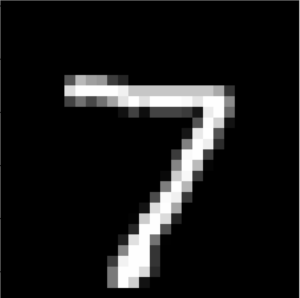

1/1 [==============================] - 0s 23ms/step
The Handwritten Digit is: 7


In [48]:
input_image = input('Enter the path of the image: ')

input_image = cv2.imread(input_image)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

reshape_image = np.reshape(input_image_resize, [1,28,28])

prediction = model.predict(reshape_image)

input_pred_label = np.argmax(prediction)

print(f'The Handwritten Digit is: {input_pred_label}')
